In [223]:
import pandas as pd
import numpy as np
import os
from datetime import date,datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
os.chdir('/home/zalewskr-erau.edu/Downloads')
files = os.listdir()
df = [pd.read_csv(i) for i in [file for file in files if 'eo_' in file]]
df = pd.concat(df)

In [73]:
df = df[df['FOUNDATION']!=0]

In [95]:
df = df.drop(df[df['RULING']==0]['RULING'].index)

In [99]:
df['RULING'] = df.apply(lambda row: dt.strptime(str(row['RULING']),'%Y%m'),axis=1)

In [139]:
df['TIME'] = df.apply(lambda row: date.today() - row['RULING'].date(),axis=1)

In [141]:
df['TIME'].sort_values()

EIN
850754365      71 days
134161600      71 days
931396809      71 days
931395081      71 days
932881084      71 days
               ...    
366039280   45269 days
366038577   45269 days
366037331   45269 days
366038002   45269 days
366037718   45269 days
Name: TIME, Length: 1421372, dtype: timedelta64[ns]

In [136]:
date.today() - df['RULING'].iloc[0].date()

datetime.timedelta(days=7863)

In [131]:
date.today()

datetime.date(2023, 12, 11)

In [133]:
df['RULING'].iloc[0].date()

datetime.date(2002, 6, 1)

In [158]:
df['INCOME_CD'].groupby(df['STATE']).mean()

STATE
AK    1.577806
AL    1.234156
AR    1.231888
AZ    1.287327
CA    1.534826
CO    1.628078
CT    1.743381
DC    2.482000
DE    2.231738
FL    1.261276
GA    1.079800
HI    1.460033
IA    1.424973
ID    1.257119
IL    1.555058
IN    1.306130
KS    1.453102
KY    1.342168
LA    1.251382
MA    2.104406
MD    1.300850
ME    1.792741
MI    1.334760
MN    1.631028
MO    1.316929
MS    1.002852
MT    1.345812
NC    1.261452
ND    1.566392
NE    1.465881
NH    1.829190
NJ    1.475813
NM    1.411841
NV    1.734278
NY    1.840898
OH    1.421030
OK    1.262709
OR    1.560145
PA    1.782895
RI    1.862864
SC    0.996670
SD    1.561935
TN    1.207368
TX    1.229206
UT    1.518045
VA    1.402855
VT    1.859399
WA    1.483845
WI    1.574101
WV    1.350508
WY    1.524960
Name: INCOME_CD, dtype: float64

In [218]:
out = pd.DataFrame(df['TIME'].groupby(df['STATE']).mean())
out = pd.DataFrame(out.squeeze().dt.days)
out = out.apply(lambda row: int(row['TIME']),axis=1)

In [180]:
out2 = pd.DataFrame(df['INCOME_AMT'].groupby(df['STATE']).mean())

In [182]:
out3 = pd.DataFrame(df['ASSET_AMT'].groupby(df['STATE']).mean())

In [226]:
pd.concat((out,out2,out3),axis=1).to_csv('time_output.csv')

<Axes: >

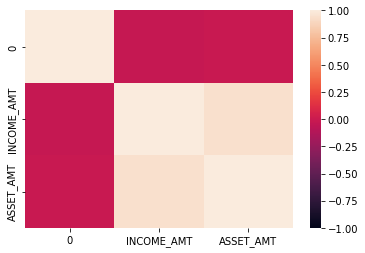

In [221]:
sns.heatmap(main_out.corr(numeric_only = True),vmin = -1, vmax = 1)